<a href="https://colab.research.google.com/github/Althaf0097/Amazon_Review_model/blob/main/Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from io import  BytesIO
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data = pd.read_csv('Amazon_Review.csv')
data.head()

<ipython-input-3-51bc4df13bb8>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Amazon_Review.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
data.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [5]:
data.shape

(34660, 21)

In [6]:
data.isna().sum()

,0
id,0
name,6760
asins,2
brand,0
categories,0
keys,0
manufacturer,0
reviews.date,39
reviews.dateAdded,10621
reviews.dateSeen,0


In [7]:
print(f"Feature names : {data.columns.values}")

Feature names : ['id' 'name' 'asins' 'brand' 'categories' 'keys' 'manufacturer'
 'reviews.date' 'reviews.dateAdded' 'reviews.dateSeen'
 'reviews.didPurchase' 'reviews.doRecommend' 'reviews.id'
 'reviews.numHelpful' 'reviews.rating' 'reviews.sourceURLs' 'reviews.text'
 'reviews.title' 'reviews.userCity' 'reviews.userProvince'
 'reviews.username']


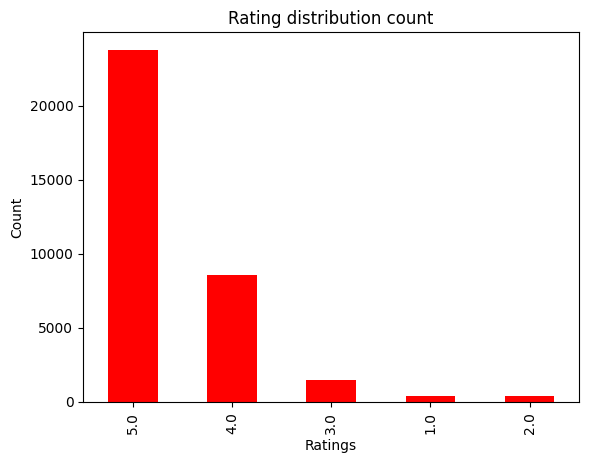

In [8]:
#Bar plot to visualize the total counts of each rating

data['reviews.rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [9]:
data['reviews.rating'].value_counts()

,count
reviews.rating,
5.0,23775
4.0,8541
3.0,1499
1.0,410
2.0,402


In [10]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['reviews.rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
reviews.rating
5.0    68.59
4.0    24.64
3.0     4.32
1.0     1.18
2.0     1.16
Name: count, dtype: float64


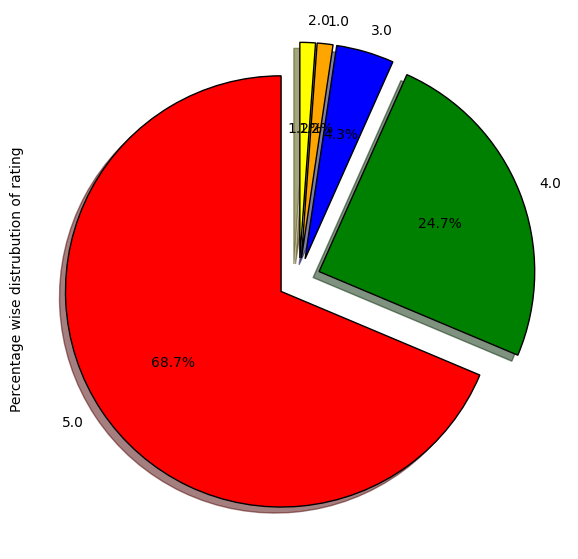

In [11]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['reviews.rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

graph = BytesIO()
fig.savefig(graph, format="png")

In [12]:

# Remove extra whitespace from column names
columns_to_drop = ['id','name','asins','brand','categories','keys','manufacturer','reviews.date','reviews.dateAdded','reviews.dateSeen',
                          'reviews.didPurchase','reviews.doRecommend','reviews.id','reviews.numHelpful','reviews.sourceURLs',
                          'reviews.title','reviews.userCity','reviews.userProvince','reviews.username']

# Drop columns
data = data.drop(columns=columns_to_drop, axis=1)

In [13]:
data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [14]:
data.isnull().sum()

,0
reviews.rating,33
reviews.text,1


In [15]:
#We will drop the null record

data.dropna(inplace=True)

In [16]:
data.isnull().sum()

,0
reviews.rating,0
reviews.text,0


In [17]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (34626, 2)


In [18]:
data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34626 non-null  float64
 1   reviews.text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [20]:
# Convert 'reviews.rating' to integer
data['reviews.rating'] = data['reviews.rating'].astype(int)

# Verify the conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.rating  34626 non-null  int64 
 1   reviews.text    34626 non-null  object
dtypes: int64(1), object(1)
memory usage: 811.5+ KB


In [21]:
data.head()

,reviews.rating,reviews.text
0,5,This product so far has not disappointed. My c...
1,5,great for beginner or experienced person. Boug...
2,5,Inexpensive tablet for him to use and learn on...
3,4,I've had my Fire HD 8 two weeks now and I love...
4,5,I bought this for my grand daughter when she c...


In [22]:
# Create the 'Sentiment' column based on 'reviews.rating'
data['Sentiment'] = data['reviews.rating'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})

# Display the updated DataFrame
data.head()

,reviews.rating,reviews.text,Sentiment
0,5,This product so far has not disappointed. My c...,Positive
1,5,great for beginner or experienced person. Boug...,Positive
2,5,Inexpensive tablet for him to use and learn on...,Positive
3,4,I've had my Fire HD 8 two weeks now and I love...,Positive
4,5,I bought this for my grand daughter when she c...,Positive


In [23]:
data = data.drop('reviews.rating', axis=1)

In [24]:
data.tail(20)

,reviews.text,Sentiment
34640,Surpassed my expectations it charges faster th...,Positive
34641,Amazon already includes this cable with the Ki...,Positive
34642,I bought this for myself because i play my kin...,Positive
34643,This cord works great! I also love that it is ...,Positive
34644,Corrected the problem with the kindle not char...,Positive
34645,"Works well with all Kindle models, either as a...",Positive
34646,I have only used it one time to download an e-...,Positive
34647,Excellent charging quality with heavy duty cor...,Positive
34648,This charger (9W) rapid charger is as describe...,Positive
34649,just what i expected and just what I wanted. t...,Positive


In [25]:
data.value_counts('Sentiment')

,count
Sentiment,
Positive,32315
Neutral,1499
Negative,812


In [28]:
# Resample the data to balance the classes (optional but recommended for imbalanced datasets)
from sklearn.utils import resample

# Separate majority and minority classes
negative_reviews = data[data['Sentiment'] == 'Negative']
positive_reviews = data[data['Sentiment'] == 'Positive']
neutral_reviews = data[data['Sentiment'] == 'Neutral']

# Upsample minority classes
negative_upsampled = resample(negative_reviews, replace=True, n_samples=len(positive_reviews), random_state=42)
neutral_upsampled = resample(neutral_reviews, replace=True, n_samples=len(positive_reviews), random_state=42)

# Combine upsampled minority classes with the majority class
data = pd.concat([positive_reviews, negative_upsampled, neutral_upsampled])

# Check the class distribution after upsampling
print(data['Sentiment'].value_counts())


Sentiment
Positive    32315
Negative    32315
Neutral     32315
Name: count, dtype: int64


In [29]:
data.shape

(96945, 2)

In [30]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For WordNet lemmatizer

# Initialize resources
stop_words = set(stopwords.words('english'))  # Load stopwords
lemmatizer = WordNetLemmatizer()             # Initialize lemmatizer
stemmer = PorterStemmer()                    # Initialize stemmer

# Preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove mentions (@username) and links (http/https)
    text = re.sub(r'@\w+|https?://\S+', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize, remove stopwords, and perform stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]

    # Lemmatize words (optional: keep stemmed or lemmatized depending on preference)
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words into a cleaned text
    return ' '.join(words)

# Apply preprocessing to the dataset
data['Cleaned_Review'] = data['reviews.text'].apply(preprocess_text)

# Display original vs. cleaned reviews
print(data[['reviews.text', 'Cleaned_Review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-30-edce06d5eb3b>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-30-edce06d5eb3b>:21: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                      Cleaned_Review  
0  product far disappoint child love use like abi...  
1     great beginn experienc person bought gift love  
2  inexpens tablet use learn step nabi thrill lea...  
3  ive fire hd two week love tablet great valuew ...  
4  bought grand daughter come visit set user ente...  


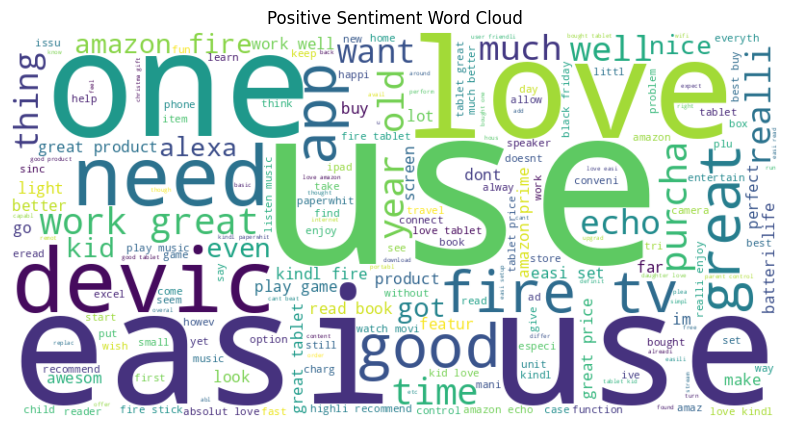

In [31]:
# prompt: generate  wordcloud for positive negative and neutral

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'data' DataFrame is already created and preprocessed as in the provided code

# Function to generate and display word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Separate text for each sentiment
positive_text = " ".join(review for review in data[data['Sentiment'] == 'Positive']['Cleaned_Review'])
negative_text = " ".join(review for review in data[data['Sentiment'] == 'Negative']['Cleaned_Review'])
neutral_text = " ".join(review for review in data[data['Sentiment'] == 'Neutral']['Cleaned_Review'])

# Generate and plot word clouds
plot_wordcloud(positive_text, "Positive Sentiment Word Cloud")


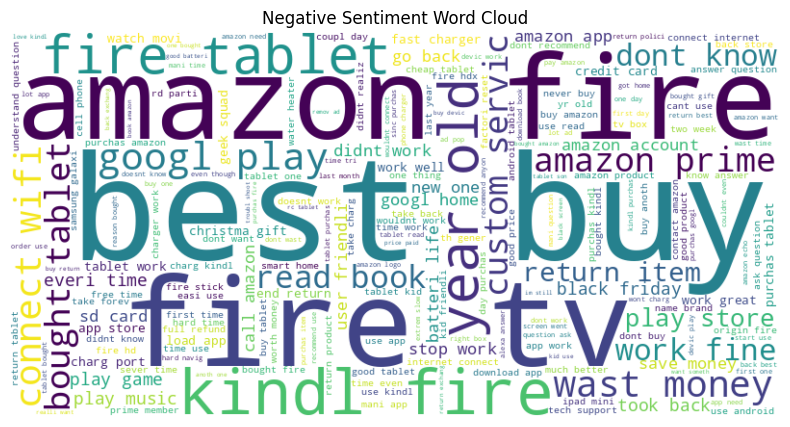

In [32]:
plot_wordcloud(negative_text, "Negative Sentiment Word Cloud")


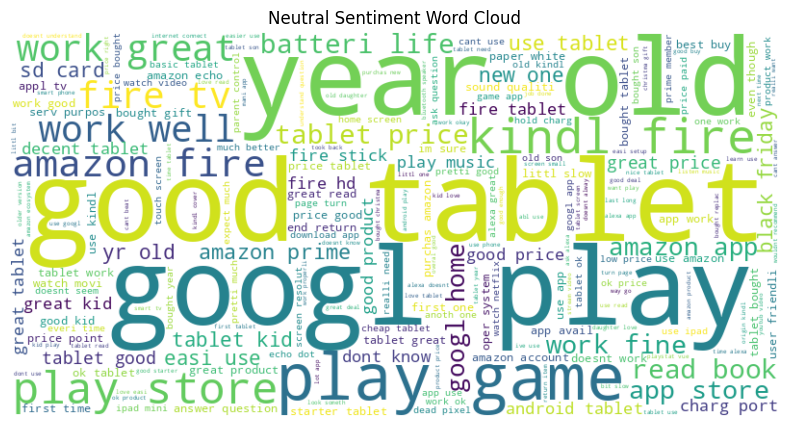

In [33]:
plot_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")

              precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      6536
     Neutral       0.80      0.83      0.82      6425
    Positive       0.87      0.81      0.84      6428

    accuracy                           0.85     19389
   macro avg       0.85      0.85      0.85     19389
weighted avg       0.85      0.85      0.85     19389

Accuracy score : 0.8487802362164114


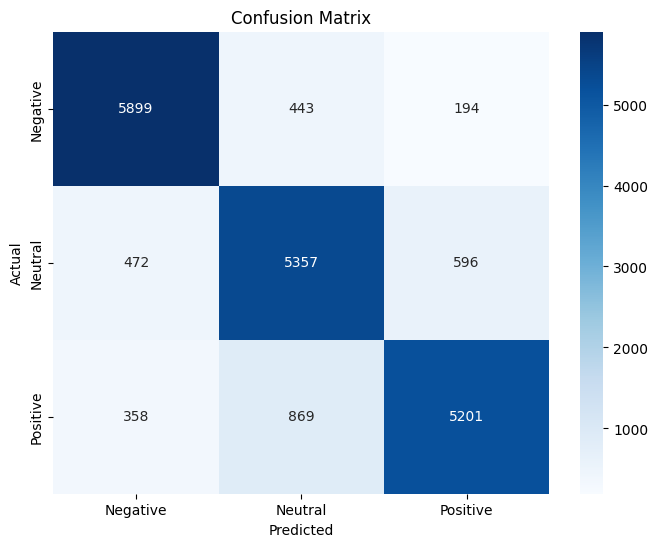

In [34]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['reviews.text'])
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [36]:
import pickle

# Save the model
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [51]:
import pickle

# Load the trained model and vectorizer
with open('sentiment_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf = pickle.load(file)

# Test inputs
test_reviews = [
    "damaged product",  # Expected: Positive
    "bad product",      # Expected: Neutral
    "damaged,never buy this product.",              # Expected: Negative
    ", well better,cheap"                                               # Edge case: Empty review
]

# Process and predict
for review in test_reviews:
    if not review.strip():  # Handle empty or whitespace-only reviews
        print(f"Input: '{review}' --> Output: Error (Empty review)")
        continue

    # Preprocess the input text (optional, depending on training pipeline)
    # Ensure this matches preprocessing during training
    preprocessed_review = review.lower()

    # Vectorize the input text
    review_vectorized = tfidf.transform([preprocessed_review])
    # Predict sentiment
    prediction = model.predict(review_vectorized)

    # Map numeric prediction to sentiment
    # Updated mapping to accommodate string labels or numeric labels
    sentiment_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

    # Access the prediction correctly based on its type
    sentiment_key = prediction[0]
    if isinstance(sentiment_key, str):  # If prediction is a string label
        sentiment = sentiment_key  # Directly use the label as sentiment
    else:  # If prediction is a numeric label
        sentiment = sentiment_mapping.get(sentiment_key, 'Unknown')  # Get sentiment from mapping, default to 'Unknown' for safety

    print(f"Input: '{review}' --> Predicted Sentiment: {sentiment}")

Input: 'damaged product' --> Predicted Sentiment: Negative
Input: 'bad product' --> Predicted Sentiment: Negative
Input: 'damaged,never buy this product.' --> Predicted Sentiment: Negative
Input: ', well better,cheap' --> Predicted Sentiment: Neutral
